#Import library

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
from PIL import Image, ImageDraw
import math
import datetime
import pandas as pd
import os
from google.colab.patches import cv2_imshow

#Read the template




In [3]:
# Read template
temp_cir = cv2.imread('/content/drive/MyDrive/Matching/pattern/Template_circle.bmp') 
temp_cro = cv2.imread('/content/drive/MyDrive/Matching/pattern/Template_cross.bmp') 
temp_border_cir = cv2.imread('/content/drive/MyDrive/Matching/pattern/Template_BorderCircle.bmp') 
temp_border_cro = cv2.imread('/content/drive/MyDrive/Matching/pattern/Template_BorderCross.bmp') 

#Part1 : Non-pyramid

## NCC

In [4]:
# Normalized Cross Correlation
def NCC(src,temp):
  ht = temp.shape[0]
  wt = temp.shape[1]
  src = src - np.sum(src)/(ht*wt)
  cor = np.sum(src*temp)
  norm = np.sqrt(np.sum(src**2))*np.sqrt(np.sum(temp**2))
  ncc = cor / norm
  return ncc

##Template matching

In [5]:
def template_matching(src,temp):
  
  # Get image shape
  hs = src.shape[0]
  ws = src.shape[1]

  ht = temp.shape[0]
  wt = temp.shape[1]
   
  #Initial setting
  [best_Y,best_X] = [0,0]
  best_ncc = 0
  src = np.array(src, dtype="int")
  temp = np.array(temp, dtype="int")
  temp = temp - np.sum(temp)/(ht*wt)
  # Store the NCC score of matching
  score = np.zeros((hs-ht+1,ws-wt+1))
  # Scan
  for y in range(0, hs-ht+1):
      for x in range(0, ws-wt+1):
          # Calculate normalized correlation coefficient (NCC)
          source = src[y:y+ht,x:x+wt]
          score[y,x] = NCC(source,temp)
          # Find the highest score
          if score[y,x] > best_ncc :
            best_ncc = score[y,x]
            [best_Y,best_X] = [y,x]

  return [best_X,best_Y]

##Check best match coordinate

In [6]:
def coordinate(src,temp) :
  
  #Calculating coordinates
  top_left = template_matching(src,temp)
  top_right = [top_left[0]+temp.shape[1]-1,top_left[1]]
  bottom_left = [top_left[0],top_left[1]+temp.shape[0]-1]
  bottom_right = [bottom_left[0]+temp.shape[1]-1,bottom_left[1]]
  return [top_left,top_right,bottom_left,bottom_right]

##Draw position 

**Circle**

In [7]:
def draw_circle(src,temp,temp_border,draw) :

  # Best match coordinate for pattern
  co = coordinate(src,temp)
  # Best match coordinate for border
  co_bo = coordinate(src,temp_border)

  # Template shape
  h = temp.shape[0]
  # Template border shape
  hb = temp_border.shape[0]
  
  # Draw pattern location
  center_coordinates = (int((co[0][0]+co[1][0])/2) , int((co[0][1]+co[2][1])/2))
  radius = int(h/2)
  color = (0,255,0) # Green in RGB (using plt)
  thickness = 3
  circle = cv2.circle(draw, center_coordinates, radius, color, thickness) # Circle
  
  plt.plot([co[0][0],co[1][0]], [co[0][1]+h/2,co[1][1]+h/2],
          color="green",linestyle="--", linewidth=1) # Horizontal dash line
  plt.plot([co[0][0]+h/2,co[2][0]+h/2],[co[0][1],co[2][1]],
          color='green',linestyle="--", linewidth=1) # Vertical dash line

  # Draw border location
  left_up = (int(co_bo[0][0]), int(co_bo[0][1]))
  right_down = (int(co_bo[3][0]), int(co_bo[3][1]))
  color = (0, 0, 255) # Blue in RGB (using plt)
  thickness = 3
  cv2.rectangle(draw, left_up, right_down, color, thickness) 

  plt.plot([co_bo[0][0],co_bo[1][0]], [co_bo[0][1]+hb/2,co_bo[1][1]+hb/2],
          color="blue",linestyle="--", linewidth=1) # Horizontal dash line
  plt.plot([co_bo[0][0]+hb/2,co_bo[2][0]+hb/2],[co_bo[0][1],co_bo[2][1]],
          color='blue',linestyle="--", linewidth=1) # Vertical dash line

  plt.imshow(draw)
  plt.savefig('/content/drive/MyDrive/Matching/match_circle/example.png')
  plt.show()

  return [co, co_bo]

**Cross**

In [8]:
def draw_cross(src,temp,temp_border,draw) :

  # Best match coordinate for pattern
  co = coordinate(src,temp)
  # Best match coordinate for border
  co_bo = coordinate(src,temp_border)

  # Template shape
  h = temp.shape[0]
  # Template border shape
  hb = temp_border.shape[0]
  
  # Draw pattern location
  left_up_p = (int(co[0][0]), int(co[0][1]))
  right_down_p = (int(co[3][0]), int(co[3][1]))
  color_p = (0, 255, 0) # Green in RGB (using plt)
  thickness_p = 3
  cv2.rectangle(draw, left_up_p, right_down_p, color_p, thickness_p) 
  
  plt.plot([co[0][0],co[1][0]], [co[0][1]+h/2,co[1][1]+h/2],
          color="green",linestyle="--", linewidth=1) # Horizontal dash line
  plt.plot([co[0][0]+h/2,co[2][0]+h/2],[co[0][1],co[2][1]],
          color='green',linestyle="--", linewidth=1) # Vertical dash line

  # Draw border location
  left_up = (int(co_bo[0][0]), int(co_bo[0][1]))
  right_down = (int(co_bo[3][0]), int(co_bo[3][1]))
  color = (0, 0, 255) # Blue in RGB (using plt)
  thickness = 3
  cv2.rectangle(draw, left_up, right_down, color, thickness) 

  plt.plot([co_bo[0][0],co_bo[1][0]], [co_bo[0][1]+hb/2,co_bo[1][1]+hb/2],
          color="blue",linestyle="--", linewidth=1) # Horizontal dash line
  plt.plot([co_bo[0][0]+hb/2,co_bo[2][0]+hb/2],[co_bo[0][1],co_bo[2][1]],
          color='blue',linestyle="--", linewidth=1) # Vertical dash line

  plt.imshow(draw)
  plt.savefig('/content/drive/MyDrive/Matching/match_cross/example.png')
  plt.show()

  return [co, co_bo]

##Combine all steps
Template matching and calculate the center position difference

**Circle**



In [9]:
# Circle
def cir_match(src,temp,temp_border,draw):
  circle = draw_circle(src,temp,temp_border,draw)
  
  pattern = circle[0]
  border = circle[1]

  px = (pattern[0][0]+pattern[1][0])/2
  bx = (border[0][0]+border[1][0])/2
  py = (pattern[0][1]+pattern[2][1])/2
  by = (border[0][1]+border[2][1])/2

  distance = math.sqrt(pow((px-bx),2)+pow((py-by),2))
  print("Center position difference : ",distance)
  
  return distance

**Cross**

In [10]:
# Cross
def cro_match(src,temp,temp_border,draw):
  cross = draw_cross(src,temp,temp_border,draw)
  
  pattern = cross[0]
  border = cross[1]

  px = (pattern[0][0]+pattern[1][0])/2
  bx = (border[0][0]+border[1][0])/2
  py = (pattern[0][1]+pattern[2][1])/2
  by = (border[0][1]+border[2][1])/2

  distance = math.sqrt(pow((px-bx),2)+pow((py-by),2))
  print("Center position difference : ",distance)
  
  return distance

##Result

**Circle**

1. Whole folder







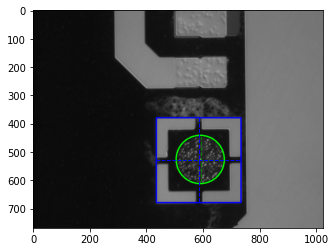

Center position difference :  6.324555320336759


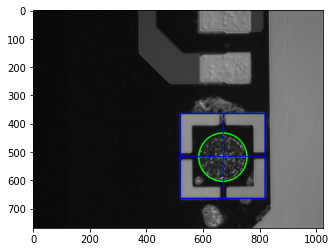

Center position difference :  5.0990195135927845


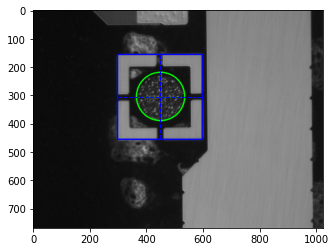

Center position difference :  3.1622776601683795


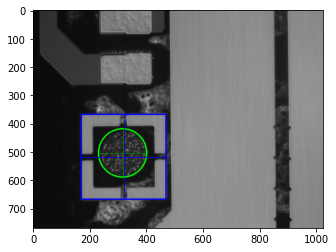

Center position difference :  13.341664064126334


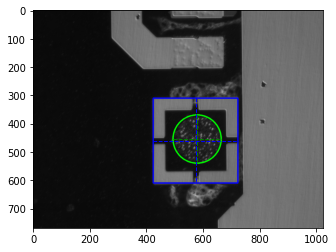

Center position difference :  7.810249675906654


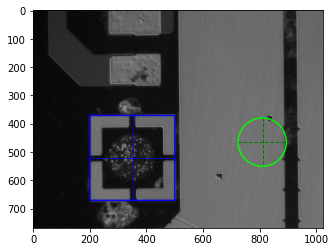

Center position difference :  462.28346282340664


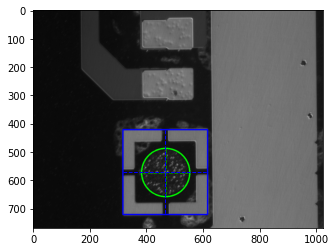

Center position difference :  2.8284271247461903


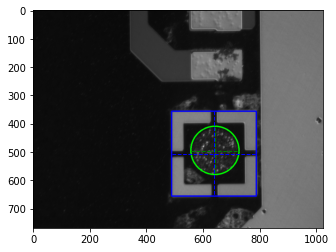

Center position difference :  11.704699910719626


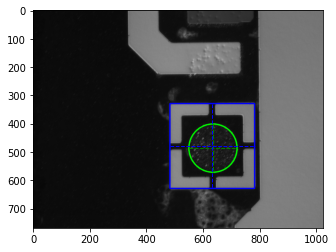

Center position difference :  8.54400374531753


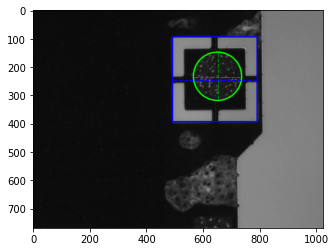

Center position difference :  14.142135623730951


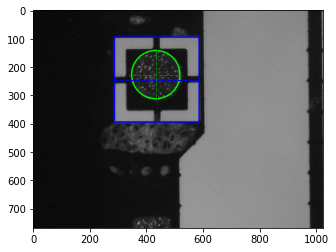

Center position difference :  17.26267650163207


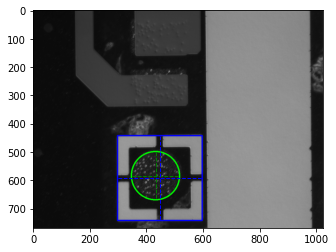

Center position difference :  17.0


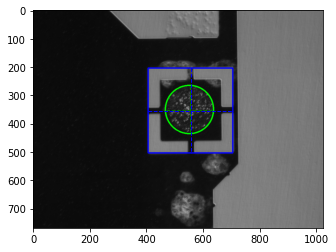

Center position difference :  4.242640687119285


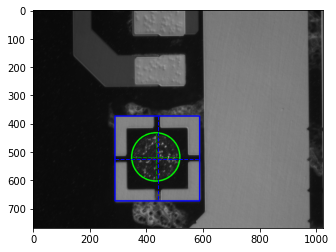

Center position difference :  7.0710678118654755


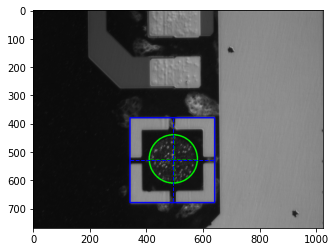

Center position difference :  5.656854249492381


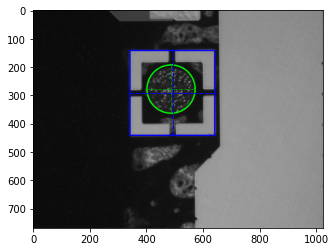

Center position difference :  13.601470508735444
Average run time :  0 days 00:24:43.240662375
          Panel1_circle1  Panel1_circle2  Panel1_circle3  Panel1_circle4  \
Distance        6.324555         5.09902        3.162278       13.341664   

          Panel2_circle1  Panel2_circle2  Panel2_circle3  Panel2_circle4  \
Distance         7.81025      462.283463        2.828427         11.7047   

          Panel3_circle1  Panel3_circle2  Panel3_circle3  Panel3_circle4  \
Distance        8.544004       14.142136       17.262677            17.0   

          Panel4_circle1  Panel4_circle2  Panel4_circle3  Panel4_circle4  
Distance        4.242641        7.071068        5.656854       13.601471  


In [ ]:
run_time = []
cir_name = []
cir_dis = []
for p in range(1,5):
  for c in range(1,5):
    # Read source
    circle_ori = cv2.imread('/content/drive/MyDrive/Matching/circle/Panel{0}_circle{1}.bmp'.format(p,c))
    blurred = cv2.medianBlur(circle_ori,9)
    start = datetime.datetime.now()
    # Template matching
    circle = cir_match(blurred,temp_cir,temp_border_cir,circle_ori)
    end = datetime.datetime.now()
    
    # Record run time
    rt = end - start
    run_time.append(rt)
    
    # Save result picture
    example = cv2.imread('/content/drive/MyDrive/Matching/match_circle/example.png')
    cv2.imwrite('/content/drive/MyDrive/Matching/match_circle/P{0}_circle{1}.png'.format(p,c),example)
    os.remove('/content/drive/MyDrive/Matching/match_circle/example.png')

    # Save each center position difference
    cir_dis.append(circle)
    cir_name.append('Panel{0}_circle{1}'.format(p,c))

run_time_avg = pd.Series(run_time).mean()
print('Average run time : ',run_time_avg)
dis_rec = pd.DataFrame(cir_dis, index = cir_name,columns = ['Distance'])
print(dis_rec.T)


In [ ]:
run_time_avg

Timedelta('0 days 00:24:43.240662375')

In [ ]:
dis_rec

,Distance
Panel1_circle1,6.324555
Panel1_circle2,5.099020
Panel1_circle3,3.162278
Panel1_circle4,13.341664
Panel2_circle1,7.810250
Panel2_circle2,462.283463
Panel2_circle3,2.828427
Panel2_circle4,11.704700
Panel3_circle1,8.544004
Panel3_circle2,14.142136


In [ ]:
dis_rec.to_csv('/content/drive/MyDrive/Matching/match_circle/match_circle_dis.csv')

2. Single image ( Deal with the mistake : Panel2_circle2 -> Wrong matching )

* Solution : Apply power law transform with gamma = 0.4
* Modify the distance record 
    



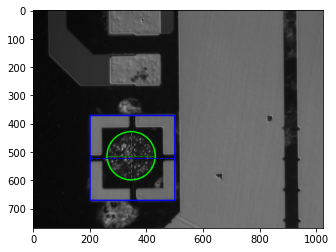

Center position difference :  8.06225774829855


In [19]:
# Read source
circle_ori = cv2.imread('/content/drive/MyDrive/Matching/circle/Panel2_circle2.bmp')
# Power law transform with gamma = 0.4
powerlaw = np.array(255*(circle_ori/255)**0.4,dtype='uint8')
#cv2_imshow(powerlaw)

# Template matching
circle = cir_match(powerlaw,temp_cir,temp_border_cir,circle_ori)

# Save result picture
example = cv2.imread('/content/drive/MyDrive/Matching/match_circle/example.png')
cv2.imwrite('/content/drive/MyDrive/Matching/match_circle/P2_circle2.png',example)
os.remove('/content/drive/MyDrive/Matching/match_circle/example.png')


In [57]:
# Modify the distance record
data = '/content/drive/MyDrive/Matching/match_circle/match_circle_dis.csv'
df_cir_dis = pd.read_csv(data)
df_cir_dis = df_cir_dis.rename(columns={'Unnamed: 0':'Image'})
df_cir_dis.iloc[5,1] = circle
dis_cir = list(df_cir_dis.iloc[:,1])
dis_cir_name = list(df_cir_dis.iloc[:,0])
dis_rec_cir = pd.DataFrame(dis_cir, index = dis_cir_name,columns = ['Distance'])
dis_rec_cir

,Distance
Panel1_circle1,6.324555
Panel1_circle2,5.099020
Panel1_circle3,3.162278
Panel1_circle4,13.341664
Panel2_circle1,7.810250
Panel2_circle2,8.062258
Panel2_circle3,2.828427
Panel2_circle4,11.704700
Panel3_circle1,8.544004
Panel3_circle2,14.142136


In [58]:
dis_rec_cir.to_csv('/content/drive/MyDrive/Matching/match_circle/match_circle_dis.csv')

**Cross**

1. Whole folder

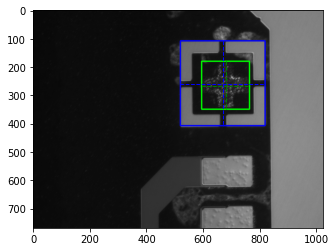

Center position difference :  12.206555615733702


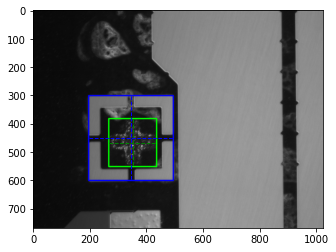

Center position difference :  17.08800749063506


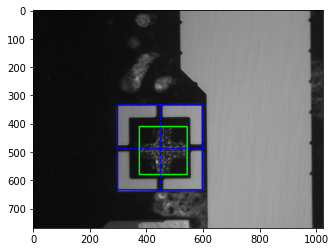

Center position difference :  16.278820596099706


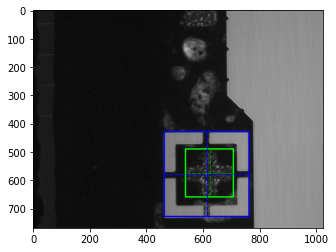

Center position difference :  10.770329614269007


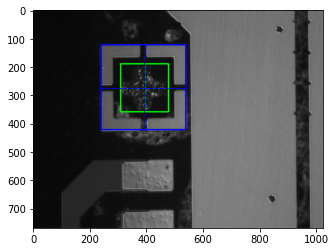

Center position difference :  4.47213595499958


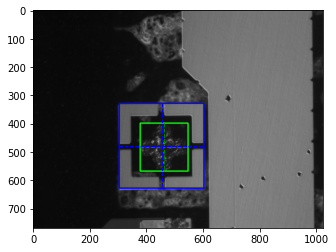

Center position difference :  10.295630140987


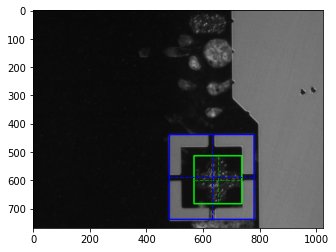

Center position difference :  24.166091947189145


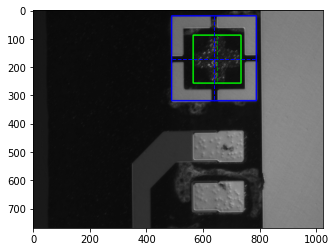

Center position difference :  11.40175425099138


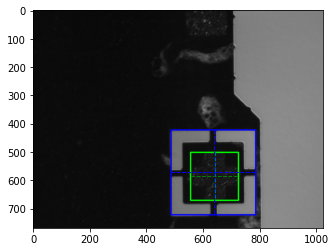

Center position difference :  14.560219778561036


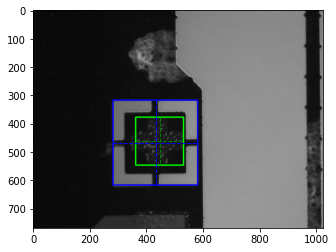

Center position difference :  15.811388300841896


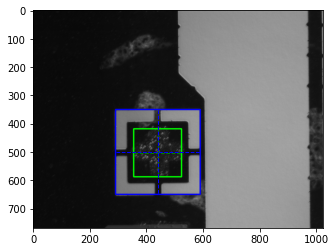

Center position difference :  3.1622776601683795


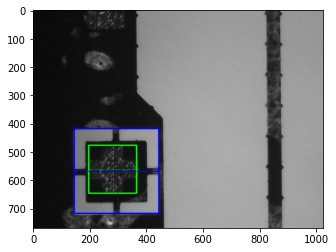

Center position difference :  15.231546211727817


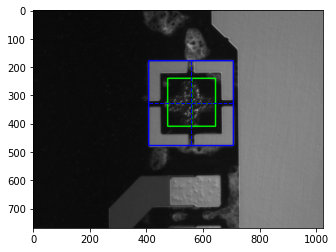

Center position difference :  3.605551275463989


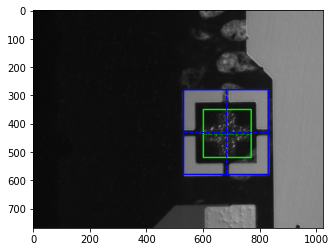

Center position difference :  7.0710678118654755


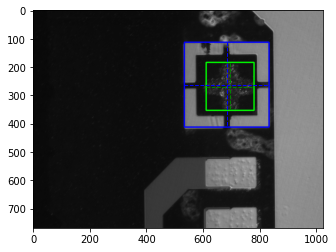

Center position difference :  13.416407864998739


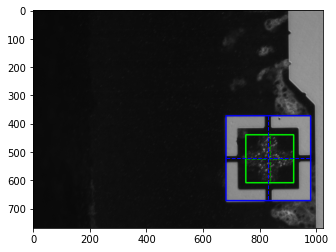

Center position difference :  5.385164807134504
Average run time :  0 days 00:25:41.053639312
          Panel1_cross1  Panel1_cross2  Panel1_cross3  Panel1_cross4  \
Distance      12.206556      17.088007      16.278821       10.77033   

          Panel2_cross1  Panel2_cross2  Panel2_cross3  Panel2_cross4  \
Distance       4.472136       10.29563      24.166092      11.401754   

          Panel3_cross1  Panel3_cross2  Panel3_cross3  Panel3_cross4  \
Distance       14.56022      15.811388       3.162278      15.231546   

          Panel4_cross1  Panel4_cross2  Panel4_cross3  Panel4_cross4  
Distance       3.605551       7.071068      13.416408       5.385165  


In [ ]:
run_time_cro = []
cro_name = []
cro_dis = []
for p in range(1,5):
  for c in range(1,5):
    # Read source
    cross_ori = cv2.imread('/content/drive/MyDrive/Matching/cross/Panel{0}_cross{1}.bmp'.format(p,c))
    blurred_cro = cv2.medianBlur(cross_ori,9)
    start = datetime.datetime.now()
    # Template matching
    cross = cro_match(blurred_cro,temp_cro,temp_border_cro,cross_ori)
    end = datetime.datetime.now()
    
    # Record run time
    rt = end - start
    run_time_cro.append(rt)
    
    # Save result picture
    example = cv2.imread('/content/drive/MyDrive/Matching/match_cross/example.png')
    cv2.imwrite('/content/drive/MyDrive/Matching/match_cross/P{0}_cross{1}.png'.format(p,c),example)
    os.remove('/content/drive/MyDrive/Matching/match_cross/example.png')

    # Save each center position difference
    cro_dis.append(cross)
    cro_name.append('Panel{0}_cross{1}'.format(p,c))

run_time_avg_cro = pd.Series(run_time_cro).mean()
print('Average run time : ',run_time_avg_cro)
dis_rec_cro = pd.DataFrame(cro_dis, index = cro_name,columns = ['Distance'])
print(dis_rec_cro.T)

In [ ]:
run_time_avg_cro

Timedelta('0 days 00:25:41.053639312')

In [ ]:
dis_rec_cro

,Distance
Panel1_cross1,12.206556
Panel1_cross2,17.088007
Panel1_cross3,16.278821
Panel1_cross4,10.770330
Panel2_cross1,4.472136
Panel2_cross2,10.295630
Panel2_cross3,24.166092
Panel2_cross4,11.401754
Panel3_cross1,14.560220
Panel3_cross2,15.811388


In [ ]:
dis_rec_cro.to_csv('/content/drive/MyDrive/Matching/match_cross/match_cross_dis.csv')

2. Single image

In [ ]:
# Read source
cross_ori = cv2.imread('/content/drive/MyDrive/Matching/cross/Panel1_cross2.bmp')
# Apply a "median" blur to the image
blurred_cro = cv2.medianBlur(cross_ori,9)
# Template matching
cross = cro_match(blurred_cro,temp_cro,temp_border_cro,cross_ori)

# Part2 : Pyramid

##Build pyramid

In [11]:
def build_pyramid(src, maxleval):
  pyramid = [src]
  for i in range(0,maxleval):
      src = cv2.pyrDown(src)
      pyramid.append(src)

  pyramid.reverse()
  return pyramid

In [12]:
def template_match_pyramid(src,temp,maxleval):
  results = []
  ## Build image pyramid
  src_p = build_pyramid(src,maxleval)
  temp_p = build_pyramid(temp,maxleval)

  ## Template match
  for idx in range(0, maxleval+1):
      src_p2 = src_p[idx]
      temp_p2 = temp_p[idx]

      if idx == 0:
          result = cv2.matchTemplate(src_p2, temp_p2, cv2.TM_CCOEFF_NORMED)
      else:
          mask = cv2.pyrUp(thresh)
          mask8u = cv2.inRange(mask, 0, 255)
          contours = cv2.findContours(mask8u, cv2.RETR_EXTERNAL,  cv2.CHAIN_APPROX_NONE)[-2]

          tH, tW = temp_p2.shape[:2]
          for cnt in contours:
              x, y, w, h = cv2.boundingRect(cnt)
              src = src_p2[y:y+h+tH, x:x+w+tW]
              result = cv2.matchTemplate(src, temp_p2, cv2.TM_CCOEFF_NORMED)

      T,thresh = cv2.threshold(result, 0.30, 1, cv2.THRESH_TOZERO)
      results.append(thresh)

  return thresh

##Template matching

In [13]:
def template_match_p(src,temp,border,maxleval=10):
  result = template_match_pyramid(src,temp,maxleval)
  result2 = template_match_pyramid(src,border,maxleval)
  
  # Find best match coordinate
  minval, maxval, minloc, maxloc = cv2.minMaxLoc(result)
  if maxval > 0:
    best_co_cir = maxloc
  minval2, maxval2, minloc2, maxloc2 = cv2.minMaxLoc(result2)
  if maxval2 > 0:
    best_co_bor = maxloc2
    
  return [best_co_cir,best_co_bor]

##Draw position

**Circle**

In [1]:
def draw_cir_p(src,temp,temp_border,draw):
  
  # Template shape
  h = temp.shape[0]
  w = temp.shape[1]
  # Template border shape
  hb = temp_border.shape[0]
  wb = temp_border.shape[1]

  # Best match coordinate for pattern
  tm = template_match_p(src,temp,temp_border,maxleval=10)
  top_left = tm[0]
  top_right = [top_left[0]+w-1,top_left[1]]
  bottom_left = [top_left[0],top_left[1]+h-1]
  bottom_right = [bottom_left[0]+w-1,bottom_left[1]]
  co = [top_left,top_right,bottom_left,bottom_right]
  # Best match coordinate for border
  top_left_b = tm[1]
  top_right_b = [top_left_b[0]+wb-1,top_left_b[1]]
  bottom_left_b = [top_left_b[0],top_left_b[1]+hb-1]
  bottom_right_b = [bottom_left_b[0]+wb-1,bottom_left_b[1]]
  co_bo = [top_left_b,top_right_b,bottom_left_b,bottom_right_b]

  # Draw pattern location
  center_coordinates = (int((co[0][0]+co[1][0])/2) , int((co[0][1]+co[2][1])/2))
  radius = int(h/2)
  color = (0,255,0) # Green in RGB (using plt)
  thickness = 3
  circle = cv2.circle(draw, center_coordinates, radius, color, thickness) # Circle
    
  plt.plot([co[0][0],co[1][0]], [co[0][1]+h/2,co[1][1]+h/2],
          color="green",linestyle="--", linewidth=1) # Horizontal dash line
  plt.plot([co[0][0]+h/2,co[2][0]+h/2],[co[0][1],co[2][1]],
          color='green',linestyle="--", linewidth=1) # Vertical dash line

  # Draw border location
  left_up = (int(co_bo[0][0]), int(co_bo[0][1]))
  right_down = (int(co_bo[3][0]), int(co_bo[3][1]))
  color = (0, 0, 255) # Blue in RGB (using plt)
  thickness = 3
  cv2.rectangle(draw, left_up, right_down, color, thickness) 

  plt.plot([co_bo[0][0],co_bo[1][0]], [co_bo[0][1]+hb/2,co_bo[1][1]+hb/2],
            color="blue",linestyle="--", linewidth=1) # Horizontal dash line
  plt.plot([co_bo[0][0]+hb/2,co_bo[2][0]+hb/2],[co_bo[0][1],co_bo[2][1]],
            color='blue',linestyle="--", linewidth=1) # Vertical dash line

  plt.imshow(draw)
  plt.savefig('/content/drive/MyDrive/Matching/match_circle_p/example.png')
  plt.show()

  return [co, co_bo]

**Cross**

In [14]:
def draw_cro_p(src,temp,temp_border,draw):
  
  # Template shape
  h = temp.shape[0]
  w = temp.shape[1]
  # Template border shape
  hb = temp_border.shape[0]
  wb = temp_border.shape[1]

  # Best match coordinate for pattern
  tm = template_match_p(src,temp,temp_border,maxleval=10)
  top_left = tm[0]
  top_right = [top_left[0]+w-1,top_left[1]]
  bottom_left = [top_left[0],top_left[1]+h-1]
  bottom_right = [bottom_left[0]+w-1,bottom_left[1]]
  co = [top_left,top_right,bottom_left,bottom_right]
  # Best match coordinate for border
  top_left_b = tm[1]
  top_right_b = [top_left_b[0]+wb-1,top_left_b[1]]
  bottom_left_b = [top_left_b[0],top_left_b[1]+hb-1]
  bottom_right_b = [bottom_left_b[0]+wb-1,bottom_left_b[1]]
  co_bo = [top_left_b,top_right_b,bottom_left_b,bottom_right_b]

  # Draw pattern location
  left_up_p = (int(co[0][0]), int(co[0][1]))
  right_down_p = (int(co[3][0]), int(co[3][1]))
  color_p = (0, 255, 0) # Green in RGB (using plt)
  thickness_p = 3
  cv2.rectangle(draw, left_up_p, right_down_p, color_p, thickness_p) 
  
  plt.plot([co[0][0],co[1][0]], [co[0][1]+h/2,co[1][1]+h/2],
          color="green",linestyle="--", linewidth=1) # Horizontal dash line
  plt.plot([co[0][0]+h/2,co[2][0]+h/2],[co[0][1],co[2][1]],
          color='green',linestyle="--", linewidth=1) # Vertical dash line

  # Draw border location
  left_up = (int(co_bo[0][0]), int(co_bo[0][1]))
  right_down = (int(co_bo[3][0]), int(co_bo[3][1]))
  color = (0, 0, 255) # Blue in RGB (using plt)
  thickness = 3
  cv2.rectangle(draw, left_up, right_down, color, thickness) 

  plt.plot([co_bo[0][0],co_bo[1][0]], [co_bo[0][1]+hb/2,co_bo[1][1]+hb/2],
          color="blue",linestyle="--", linewidth=1) # Horizontal dash line
  plt.plot([co_bo[0][0]+hb/2,co_bo[2][0]+hb/2],[co_bo[0][1],co_bo[2][1]],
          color='blue',linestyle="--", linewidth=1) # Vertical dash line

  plt.imshow(draw)
  plt.savefig('/content/drive/MyDrive/Matching/match_cross_p/example.png')
  plt.show()

  return [co, co_bo]

##Combine all step
Template matching and calculate the center position difference

**Circle**

In [15]:
# Circle
def cir_match_p(src,temp,temp_border,draw):
  circle = draw_cir_p(src,temp,temp_border,draw)
  
  pattern = circle[0]
  border = circle[1]

  px = (pattern[0][0]+pattern[1][0])/2
  bx = (border[0][0]+border[1][0])/2
  py = (pattern[0][1]+pattern[2][1])/2
  by = (border[0][1]+border[2][1])/2

  distance = math.sqrt(pow((px-bx),2)+pow((py-by),2))
  print("Center position difference : ",distance)
  
  return distance

**Cross**

In [16]:
# Cross
def cro_match_p(src,temp,temp_border,draw):
  cross = draw_cro_p(src,temp,temp_border,draw)
  
  pattern = cross[0]
  border = cross[1]

  px = (pattern[0][0]+pattern[1][0])/2
  bx = (border[0][0]+border[1][0])/2
  py = (pattern[0][1]+pattern[2][1])/2
  by = (border[0][1]+border[2][1])/2

  distance = math.sqrt(pow((px-bx),2)+pow((py-by),2))
  print("Center position difference : ",distance)
  
  return distance

##Result

**Circle**

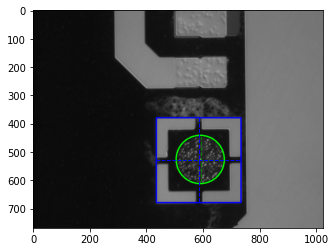

Center position difference :  6.324555320336759


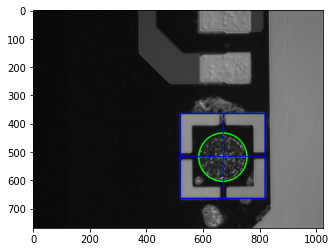

Center position difference :  5.0990195135927845


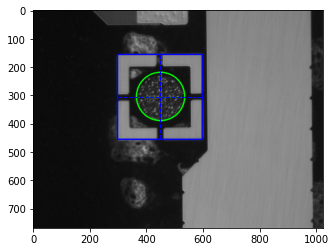

Center position difference :  3.1622776601683795


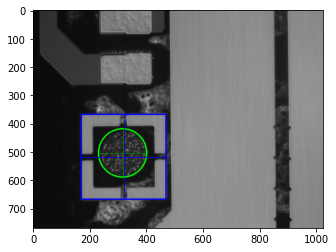

Center position difference :  13.341664064126334


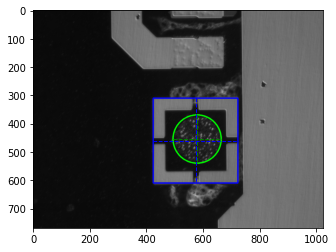

Center position difference :  7.810249675906654


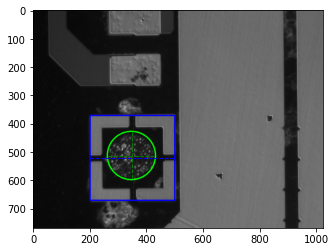

Center position difference :  8.54400374531753


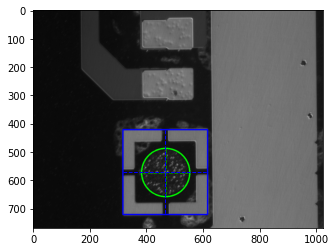

Center position difference :  2.8284271247461903


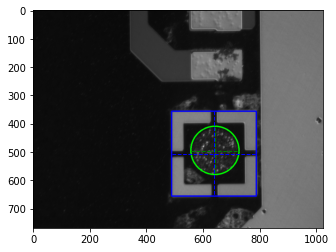

Center position difference :  11.704699910719626


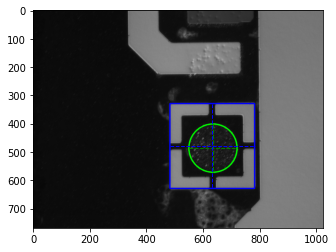

Center position difference :  8.54400374531753


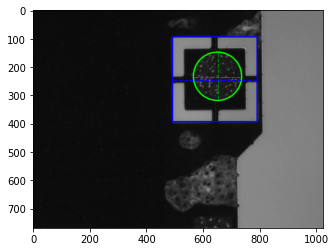

Center position difference :  14.142135623730951


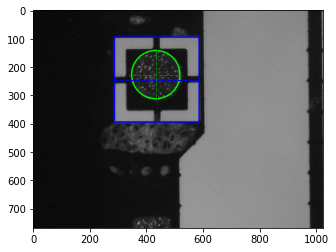

Center position difference :  17.26267650163207


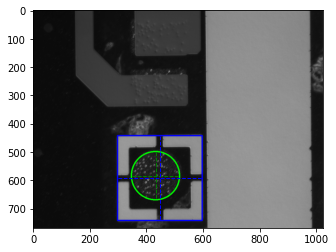

Center position difference :  17.0


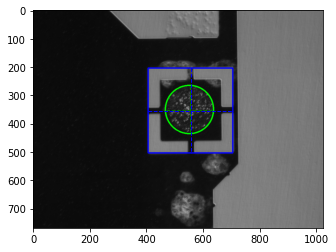

Center position difference :  4.242640687119285


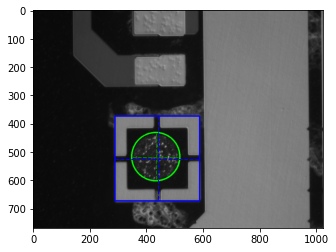

Center position difference :  7.810249675906654


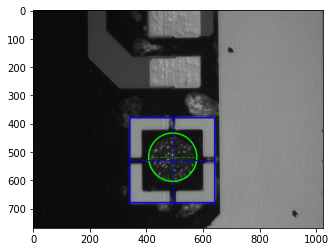

Center position difference :  10.198039027185569


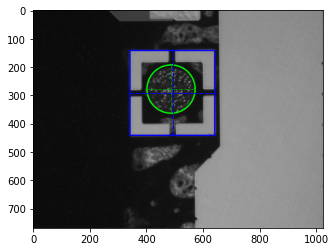

Center position difference :  13.601470508735444
Average run time :  0 days 00:00:00.749987812
          Panel1_circle1  Panel1_circle2  Panel1_circle3  Panel1_circle4  \
Distance        6.324555         5.09902        3.162278       13.341664   

          Panel2_circle1  Panel2_circle2  Panel2_circle3  Panel2_circle4  \
Distance         7.81025        8.544004        2.828427         11.7047   

          Panel3_circle1  Panel3_circle2  Panel3_circle3  Panel3_circle4  \
Distance        8.544004       14.142136       17.262677            17.0   

          Panel4_circle1  Panel4_circle2  Panel4_circle3  Panel4_circle4  
Distance        4.242641         7.81025       10.198039       13.601471  


In [ ]:
run_time_p = []
cir_name_p = []
cir_dis_p = []
for p in range(1,5):
  for c in range(1,5):
    # Read source
    circle_ori = cv2.imread('/content/drive/MyDrive/Matching/circle/Panel{0}_circle{1}.bmp'.format(p,c))
    blurred = cv2.medianBlur(circle_ori,9)
    start = datetime.datetime.now()
    # Template matching
    circle = cir_match_p(blurred,temp_cir,temp_border_cir,circle_ori)
    end = datetime.datetime.now()
    
    # Record run time
    rt = end - start
    run_time_p.append(rt)
    
    # Save result picture
    example = cv2.imread('/content/drive/MyDrive/Matching/match_circle_p/example.png')
    cv2.imwrite('/content/drive/MyDrive/Matching/match_circle_p/P{0}_circle{1}.png'.format(p,c),example)
    os.remove('/content/drive/MyDrive/Matching/match_circle_p/example.png')

    # Save each center position difference
    cir_dis_p.append(circle)
    cir_name_p.append('Panel{0}_circle{1}'.format(p,c))

run_time_avg_p = pd.Series(run_time_p).mean()
print('Average run time : ',run_time_avg_p)
dis_rec_p = pd.DataFrame(cir_dis_p, index = cir_name_p,columns = ['Distance'])
print(dis_rec_p.T)

In [ ]:
run_time_avg_p

Timedelta('0 days 00:00:00.749987812')

In [ ]:
dis_rec_p

,Distance
Panel1_circle1,6.324555
Panel1_circle2,5.099020
Panel1_circle3,3.162278
Panel1_circle4,13.341664
Panel2_circle1,7.810250
Panel2_circle2,8.544004
Panel2_circle3,2.828427
Panel2_circle4,11.704700
Panel3_circle1,8.544004
Panel3_circle2,14.142136


In [ ]:
dis_rec_p.to_csv('/content/drive/MyDrive/Matching/match_circle_p/circle_pyramid_dis.csv')

**Cross**

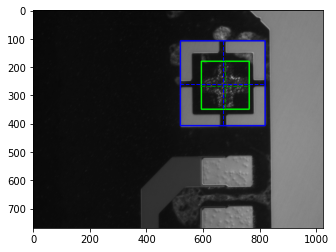

Center position difference :  11.40175425099138


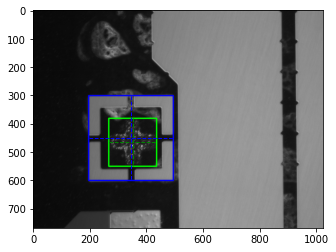

Center position difference :  16.15549442140351


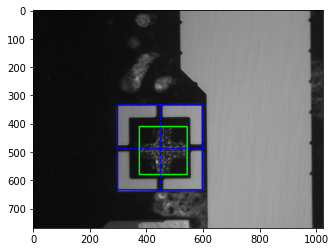

Center position difference :  16.278820596099706


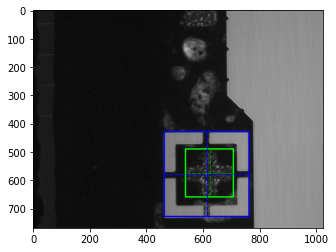

Center position difference :  10.770329614269007


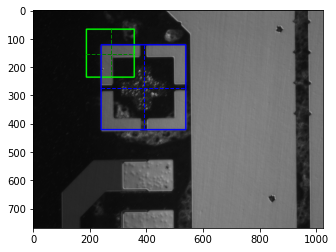

Center position difference :  167.59773268156107


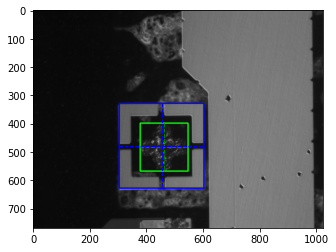

Center position difference :  10.295630140987


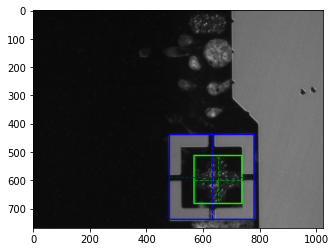

Center position difference :  23.769728648009426


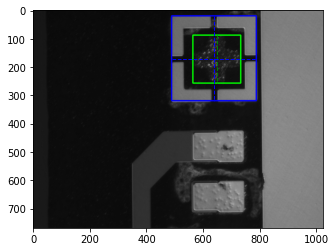

Center position difference :  10.44030650891055


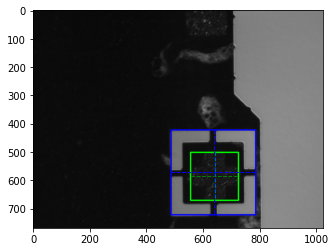

Center position difference :  14.560219778561036


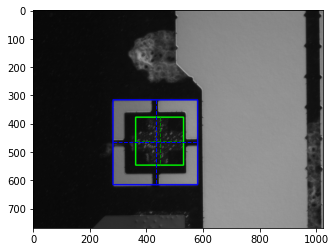

Center position difference :  15.524174696260024


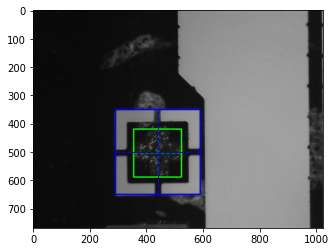

Center position difference :  4.123105625617661


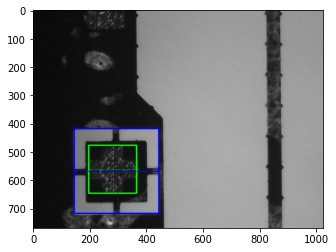

Center position difference :  15.231546211727817


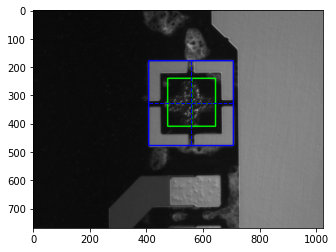

Center position difference :  3.605551275463989


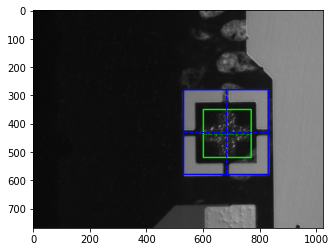

Center position difference :  7.0710678118654755


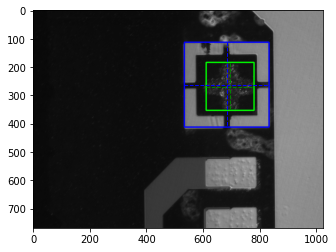

Center position difference :  13.416407864998739


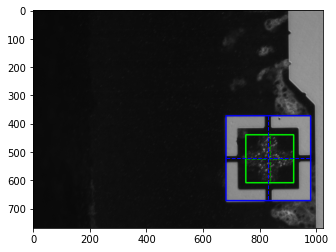

Center position difference :  5.385164807134504
Average run time :  0 days 00:00:00.713385562
          Panel1_cross1  Panel1_cross2  Panel1_cross3  Panel1_cross4  \
Distance      11.401754      16.155494      16.278821       10.77033   

          Panel2_cross1  Panel2_cross2  Panel2_cross3  Panel2_cross4  \
Distance     167.597733       10.29563      23.769729      10.440307   

          Panel3_cross1  Panel3_cross2  Panel3_cross3  Panel3_cross4  \
Distance       14.56022      15.524175       4.123106      15.231546   

          Panel4_cross1  Panel4_cross2  Panel4_cross3  Panel4_cross4  
Distance       3.605551       7.071068      13.416408       5.385165  


In [ ]:
run_time_cro_p = []
cro_name_p = []
cro_dis_p = []
for p in range(1,5):
  for c in range(1,5):
    # Read source
    cross_ori = cv2.imread('/content/drive/MyDrive/Matching/cross/Panel{0}_cross{1}.bmp'.format(p,c))
    blurred_cro = cv2.medianBlur(cross_ori,9)
    start = datetime.datetime.now()
    # Template matching
    cross = cro_match_p(blurred_cro,temp_cro,temp_border_cro,cross_ori)
    end = datetime.datetime.now()
    
    # Record run time
    rt = end - start
    run_time_cro_p.append(rt)
    
    # Save result picture
    example = cv2.imread('/content/drive/MyDrive/Matching/match_cross_p/example.png')
    cv2.imwrite('/content/drive/MyDrive/Matching/match_cross_p/P{0}_cross{1}.png'.format(p,c),example)
    os.remove('/content/drive/MyDrive/Matching/match_cross_p/example.png')

    # Save each center position difference
    cro_dis_p.append(cross)
    cro_name_p.append('Panel{0}_cross{1}'.format(p,c))

run_time_avg_cro_p = pd.Series(run_time_cro_p).mean()
print('Average run time : ',run_time_avg_cro_p)
dis_rec_cro_p = pd.DataFrame(cro_dis_p, index = cro_name_p,columns = ['Distance'])
print(dis_rec_cro_p.T)

In [ ]:
run_time_avg_cro_p

Timedelta('0 days 00:00:00.713385562')

In [ ]:
dis_rec_cro_p

,Distance
Panel1_cross1,11.401754
Panel1_cross2,16.155494
Panel1_cross3,16.278821
Panel1_cross4,10.770330
Panel2_cross1,167.597733
Panel2_cross2,10.295630
Panel2_cross3,23.769729
Panel2_cross4,10.440307
Panel3_cross1,14.560220
Panel3_cross2,15.524175


**Deal with mistake** 
**( Panel2_cross1 -> Wrong matching )**

1. Solution : Change median filter mask from 9 to 15
2. Modify the distance record

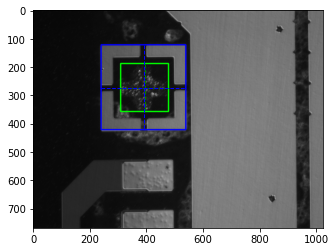

Center position difference :  4.123105625617661


In [ ]:
# Read source
cross_ori = cv2.imread('/content/drive/MyDrive/Matching/cross/Panel2_cross1.bmp')

# Change median blur mask from 9 to 15
blurred_cro = cv2.medianBlur(cross_ori,15)

# Template matching
cross = cro_match_p(blurred_cro,temp_cro,temp_border_cro,cross_ori)

# Save result picture
example = cv2.imread('/content/drive/MyDrive/Matching/match_cross_p/example.png')
cv2.imwrite('/content/drive/MyDrive/Matching/match_cross_p/P2_cross1.png',example)
os.remove('/content/drive/MyDrive/Matching/match_cross_p/example.png')

In [ ]:
# Modify the distance record
dis_rec_cro_p.iloc[4,0] = cross
dis_rec_cro_p

,Distance
Panel1_cross1,11.401754
Panel1_cross2,16.155494
Panel1_cross3,16.278821
Panel1_cross4,10.770330
Panel2_cross1,4.123106
Panel2_cross2,10.295630
Panel2_cross3,23.769729
Panel2_cross4,10.440307
Panel3_cross1,14.560220
Panel3_cross2,15.524175


In [ ]:
dis_rec_cro_p.to_csv('/content/drive/MyDrive/Matching/match_cross_p/cross_pyramid_dis.csv')